# 03. 평가
데이터 가공/변환->모델 학습/예측->평가<br>
모델의 예측 성능의 평가를 위해 정확도(Accuracy)를 이용<br><br>
성능평가지표(Evalaution Metric)은 모델이 분류나 회귀냐에 따라 여러 종류로 나뉨<br>
회귀: 실제값과 예측값의 오차 평균값에 기반<br>
분류: 0과 1로 결정값이 한정되는 이진 분류의 성능 평가 지표에 대하여 집중적으로 설명<br>
정확도보다는 다른 성능평가지표가 더 중요<br><br>
분로의 성능 평가 지표: 정확도(Accuracy), 오차행렬(Confusion Matrix), 정밀도(Precision), 재현율(Recall), F1 스코어, ROC AUC

## 01. 정확도(Accuracy)
실제 데이터에서 예측 데이터가 얼마나 같은지 판단<br>
정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수<br><br>
정확도 지표가 어떻게 ML 모델의 성능을 왜곡하는가?<br>

In [72]:
import pandas as pd
import numpy as np
from IPython.display import Image
#import warnings 
#warnings.filterwarnings('ignore')

### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred
    
## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 타이타닉 데이터 로딩 및 학습 데이터 / 테스트 데이터 분할
titanic_df = pd.read_csv('C:\\Users\\user\\Data_Handling\\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

#위에서 생성한 Dummy Classifier를 이용해 학습/예측/평
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


특히 정확도는 불균형한 레이블값 분포에서 적합하지 않음<br>
MNIST에서 7만 True, 나머지는 모두 False

In [36]:
#불균형한 데이터 세트와 Dummy Classifier 생성
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    #입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

#사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=1)

In [42]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:f}'.format(accuracy_score(y_test, fakepred)))

#단지 모든 것을 0으로만 예측해도 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900000


## 02. 오차행렬

학습된 분류모델이 예측을 수행하면서 얼마나 헷갈리고 있는지<br>
이진분류의 예측 오류가 얼마인지와 더불어 어떤 유형의 예측 오류가 발생하고 있는지

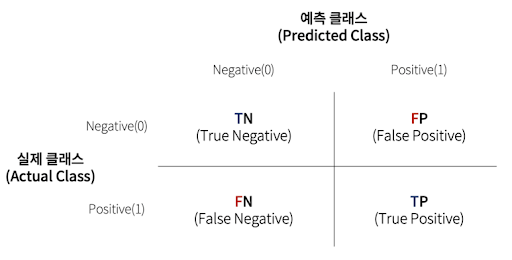

In [74]:
from PIL import Image
image = Image.open('C:\\Users\\user\\Documents\\Untitled Folder 2\\confusionmatrix.png')
display(image)

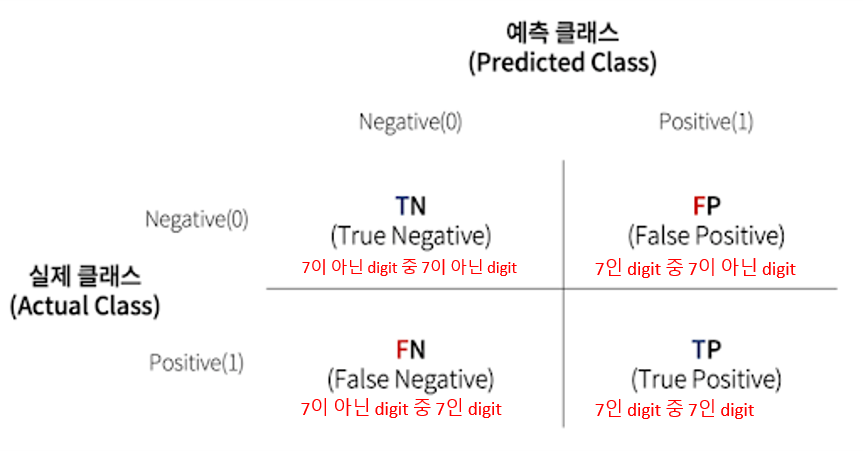

In [77]:
image2 = Image.open('C:\\Users\\user\\Documents\\Untitled Folder 2\\confmat2.png')
display(image2)

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

#테스트 데이터 세트 클래스값 분포는 0이 405, 1이 45건

array([[405,   0],
       [ 45,   0]], dtype=int64)

정확도 = 예측 결과와 실제 값이 동일한 건수/전체 데이터 수<br>
       = (TN + TP) / (TN + TP + FN + FP)<br><br>

불균형한 이진 분류 데이터 세트에서는 positive 건수가 매우 작아 ML 알고리즘은 negative로 예측 정확도가 높아짐<br>
TN은 매우 커지고 TP는 매우 작아짐<br>
FN(Negative로 예측할 때 틀린 데이터 수)은 매우 작고 FP도 매우 작아짐<br>
--> 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Negative에 대한 예측 정확도 만으로도 분류의 정확도가 매우 높게 나타나는 수치적 판단 오류 일으킴<br>

## 03. 정밀도와 재현율

positive 데이터 세트에 좀 더 초점을 맞춤<br>
정밀도 = TP / (FP + TP) #예측을 positive로 한 대상 중 일치하는 데이터 비율<br>
재현율 = TP / (FN + TP) #실제값이 positive 중 예측과 실제값이 일치<br><br>

*정밀도 중요<br>
실제 negative인 데이터를 positive로 잘못 판단하면 업무상 큰 영향이 발생하는 경우<br>
ex) 스팸 메일<br>
실제 negative인 일반 메일을 positive인 스펨 메일로 분류할 경우에는 메일을 아예 받지 못하게 돼 업무에 차질이 생김<br><br>

*재현율 중요<br>
실제 positive 양성 데이터를 negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우<br>
ex) 실제 positive인 암 환자를 negative로 잘못 판단 -> 오류의 댓가로 생명...<br>
실제 negative한 암 환자를 positive로 잘못 판단 -> 다시 검사<br><br>

ex) 보험 사기와 같은 금융 사기 적발 모델<br>
    실제 금융거래 사기인 positive건을 negative로 잘못 판단하게 되면 회사에 미치는 손해가 클 것임<br>
    정상 금융거래인 negative를 금융사기인 positive로 잘못 판단하더라도 다시 한 번 금융사기인지 재확인하는 절차<br><br>

    

In [124]:
#사잇킷런은 정밀도 계산을 위해 precision_score(), 재현율 계산을 위해 recall_score() API로 제공
#평가를 한 번에 호출하는 get_clf_eval() 함수

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:f}, 정밀도: {1:f}, 재현율: {2:f}'.format(accuracy, precision, recall))

In [90]:
#로지스틱 회귀 기반으로 타이타닉 생존자 예측하고 평가 수행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('C:\\Users\\user\\Data_Handling\\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.849162, 정밀도: 0.774194, 재현율: 0.786885


## 정밀도/재현율 트레이드오프

임곗값(Threshold)를 조정하여 수치를 높임<br>
트레이드오프: 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움<br><br>

일반적으로 이진분류에서는 임곗값을 0.5, 즉 50%로 잡고, 이 기준값보다 크면 positive, 작으면 negative

사이킷런은 개별 데이터별로 예측 확률을 반환해주는 메서드인 predict_proba() 제공<br>
predict_proba() 메서드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함<br>
predict()와 비슷하지만 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과

In [92]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한 눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46198241 0.53801759]
 [0.87863883 0.12136117]
 [0.87716256 0.12283744]]
두 개의 class 중에서 더 큰 확률을 클래스값으로 예측 
 [[0.46198241 0.53801759 1.        ]
 [0.87863883 0.12136117 0.        ]
 [0.87716256 0.12283744 0.        ]]


predict()는 predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정하는 API<br><br>
이러한 로직을 직접 코드로 구현하면서 정밀도/재현율 트레이드오프 방식을 이해해보자

In [93]:
#threshold 변수를 특정값으로 설정하고 Binarizer 클래스를 객체로 생성
#생성된 Binarizer객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0값, 크면 1값으로 변환해 반환

from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

#X의 개별 원소들이 threshold값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [95]:
#Binarizer를 이용해 사이킷런 predict()의 의사(pseudo) 코드를 만들어봄
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값
custom_threshold = 0.5

#predict_proba() 반환값의 두 번째 칼럼(positive 클래스 칼럼 하나만) 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)
#앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier 객체에서 호출된 predict()로 계산된 지표와 정확히 같음
#--> predict()가 predict_proba()에 기반함

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.849162, 정밀도: 0.774194, 재현율: 0.786885


In [96]:
#분류결정임곗값을 낮춤
#Binarizer의 threshold 설정값을 0.4로 설정, 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤

custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.832402, 정밀도: 0.718310, 재현율: 0.836066


임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어짐<br>
분류 결정 임곗값은 Positive 예측값을 결정하는 확률이 기준이 됨.<br>
Positive로 예측을 너그럽게 하기 때문에 임곗값을 낮출수록 True값이 많아지게 됨<br><br>

Positive 예측값이 많아지면 재현율 값이 높아짐<br>
양성 예측 많이 하다보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문<br>

In [129]:
#임곗값이 0.4에서 0.6까지 0.05씩 증가시키며 평가 지표 조사
thresholds = [0.4, 0.45, 0.4, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print(sep='\n')
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.832402, 정밀도: 0.718310, 재현율: 0.836066

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.849162, 정밀도: 0.765625, 재현율: 0.803279

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.832402, 정밀도: 0.718310, 재현율: 0.836066

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.865922, 정밀도: 0.836364, 재현율: 0.754098

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.877095, 정밀도: 0.882353, 재현율: 0.737705



In [130]:
#사이킷런은 이와 유사한 precision_recall_curve() API를 제공

from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 단계으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

#임계값 증가할수록 정밀도 값 높아지고 재현율값 낮아짐

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


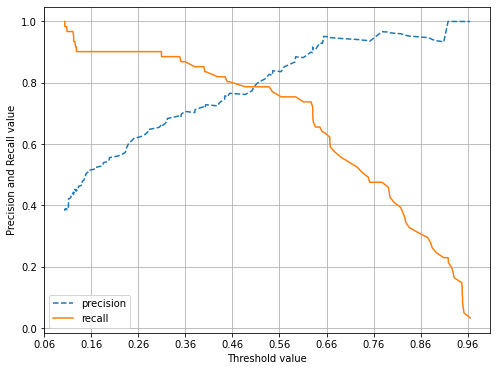

In [101]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 array 추출
    precidions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
#재현율값 낮아지고 정밀도값 높아짐
#약 0.45에서 비슷

*정밀도 100% 되는 방법<br>
확실한 기준이 되는 경우에만 positive 예측, 나머지는 모두 negative로 예측<br>
ex) 한 명만 positive, 나머지는 모두 negative -> TP / (TP + FP) = 1 / (1+0) = 100%<br><br>

*재현율 100%<br>
모든 환자 positive<br>
전체 환자 1000명을 다 positive로 예측함. 실제 양성은 30명.<br>
ex) TP / (TP + FN) = 30 / (30 + 0) = 100%

## 04. F1 스코어: 정밀도와 재현율 결합
어느 한쪽으로 치우치지 않은 수치를 나타낼 때 높은 값을 가짐<br><br>

F1 = 2 / (1/recall + 1/precision)<br><br>

사이킷런은 f1_score API 제공함

In [103]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [105]:
#임곗값 변화시키면서 평가지표 구해보기

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    #F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    #f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
          
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

#F1 스코어는 0.6일 때 가장 좋지만 재현율이 크게 감소하고 있음

임곗값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727
임곗값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036


## 05. ROC 곡선과 AUC
ROC: 수신자 판단 곡선<br>
FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변화하는지 나타내는 곡선<br>
FPR을 X축, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선으로 나타남<br><br>
TPR(True Positive Rate)은 재현율<br>
TNR(True Negative Rate)은 특이성. TN / (FP + TN)<br>
FPR은 1 - TNR

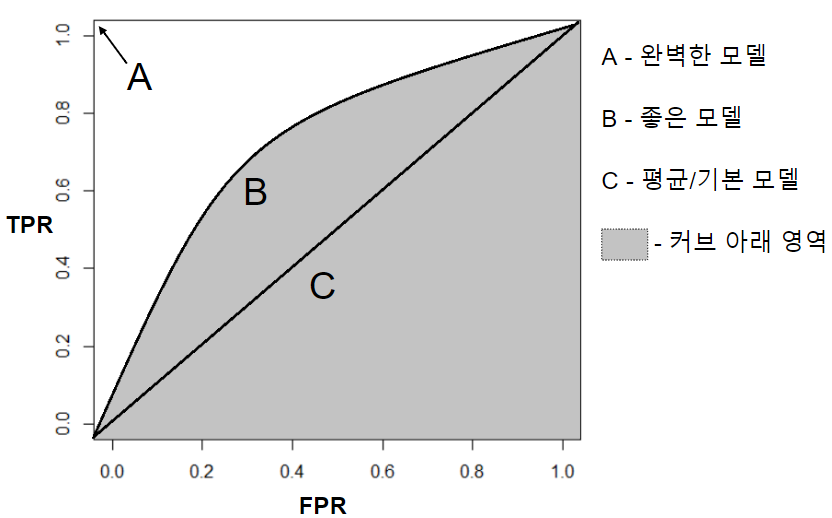

In [106]:
from PIL import Image
image = Image.open('C:\\Users\\user\\Documents\\Untitled Folder 2\\roc.png')
display(image)

FPR = FP / (FP + TN)<br><br>

FPR을 0으로 만들려면 FP를 0으로->임계값을 1로<br>
FPR을 1로 만들려면 TN을 0으로->임계값을 0으로<br>

In [109]:
from sklearn.metrics import roc_curve

#레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출
#thresholds[0]은 max(예측 확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

#5 step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

#roc_curve()의 결과를 살펴보면 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐
#FPR이 조금씩 커질 때 TPR은 가파르게 커짐

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


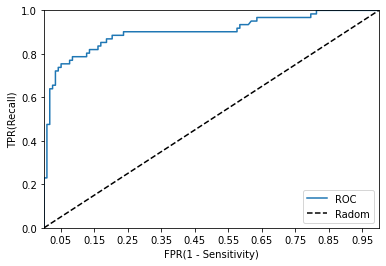

In [110]:
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label='Radom')
    
    #FPR X축의 Scale을 0.1단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

AUC값: ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울 수록 좋은 수치<br>
FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건<br>
가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC, AUC 성능 수치를 얻게 됨<br>
가운데 대각선 직선은 랜덤 수준의 이진분류 AUC값으로 0.5<br>

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

In [136]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값 : {:.4f}'.format(roc_score))

ROC AUC 값 : 0.8341


## 피마 인디언 당뇨병 예측

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

diabetes_data = pd.read_csv('.//diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

#negative 더 많음

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [141]:
diabetes_data.info()

#Null값 없고 피처 타입 모두 숫자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [143]:
# 평가지표 출력하는 함수 설정
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [144]:
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

In [153]:
#피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
#맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
# 피쳐 데이터 세트 X, 레이블 데이터 세트 y 를 추출
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:, -1]

# 데이터를 훈련과 테스트 데이터 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:1]

get_clf_eval(y_test, pred)


오차행렬:
 [[88 12]
 [23 31]]

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
AUC: 0.7270


전체 데이터 65%가 Negative이므로 재현율에 초점

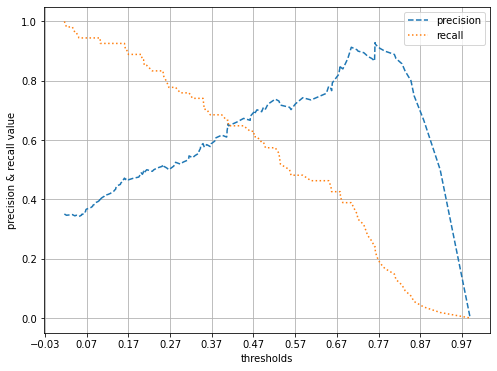

In [157]:
#정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화 확인
predict_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, predict_proba_c1)

#임곗값 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞춤
#그러나 여전히 두 지표의 값이 낮음
#원 데이터 다시 점검

In [158]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

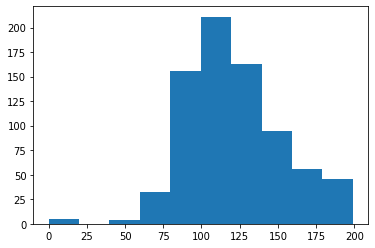

In [159]:
plt.hist(diabetes_data['Glucose'], bins=10)

min()값이 얼마나 존재하는지, 전체 데이터 건수 대비 몇 퍼센트인지 확인

In [160]:
#0값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

#피처 별로 반복하면서 데이터 값이 0인 데이터 건수 추출, 퍼센트 계싼
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


SkinThickness와 Insulin의 0의 값은 각각 29.56%dhk 48.70%로 대단히 많기에 삭제 대신 평균값으로 대체

In [161]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

데이터 세트에 피처 스케일링 적용해 변환<br>
로지스틱 회귀는 숫자 데이터에 스케일링 적용하는 것이 좋음<br>
이후에 다시 학습/테스트 데이터 세트 나누고 로지스틱 회귀 적용해 성능 평가 지표 확인<br>

In [164]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

#StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

#데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선됨
#재현율 수치 개선 필요->임곗값 변화시키면서 확인

오차행렬:
 [[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
AUC: 0.7556


In [165]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

#p.181 표
#0.48이 전체적으로 성능평가지표 유지하면서 재현율 올림

임곗값: 0.3
오차행렬:
 [[67 33]
 [11 43]]

정확도: 0.7143
정밀도: 0.5658
재현율: 0.7963
F1: 0.6615
AUC: 0.7331

임곗값: 0.33
오차행렬:
 [[72 28]
 [12 42]]

정확도: 0.7403
정밀도: 0.6000
재현율: 0.7778
F1: 0.6774
AUC: 0.7489

임곗값: 0.36
오차행렬:
 [[76 24]
 [15 39]]

정확도: 0.7468
정밀도: 0.6190
재현율: 0.7222
F1: 0.6667
AUC: 0.7411

임곗값: 0.39
오차행렬:
 [[78 22]
 [16 38]]

정확도: 0.7532
정밀도: 0.6333
재현율: 0.7037
F1: 0.6667
AUC: 0.7419

임곗값: 0.42
오차행렬:
 [[84 16]
 [18 36]]

정확도: 0.7792
정밀도: 0.6923
재현율: 0.6667
F1: 0.6792
AUC: 0.7533

임곗값: 0.45
오차행렬:
 [[85 15]
 [18 36]]

정확도: 0.7857
정밀도: 0.7059
재현율: 0.6667
F1: 0.6857
AUC: 0.7583

임곗값: 0.48
오차행렬:
 [[88 12]
 [19 35]]

정확도: 0.7987
정밀도: 0.7447
재현율: 0.6481
F1: 0.6931
AUC: 0.7641

임곗값: 0.5
오차행렬:
 [[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
AUC: 0.7556



앞에서 학습된 로지스틱 회귀 모델을 이용해 임계값을 0.48로 설정한 상태에서 다시 예측<br>
Binarizer() 클래스 이용해 predict_proba()로 추출한 예측 결과 확률값을 변환해 변경된 임곗값에 따른 예측 클래스값 구해보기<br>

In [167]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048)

오차행렬:
 [[88 12]
 [19 35]]

정확도: 0.7987
정밀도: 0.7447
재현율: 0.6481
F1: 0.6931
AUC: 0.7641
